In [1]:
import dgl
import numpy as np
import pandas as pd

import torch as th

In [2]:
pd.set_option('display.max_rows', 99)
pd.set_option('display.max_columns', 99)

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
filename = '2022-12-25_bc-canada_sendage.h5'
boulders = pd.read_hdf(filename, 'boulders')
ascents_df = pd.read_hdf(filename, 'ascents')
climbs_df = pd.read_hdf(filename, 'climbs')
climbers_df = pd.read_hdf(filename, 'climbers')

In [5]:
climbers_df = climbers_df.reset_index().set_index('name').rename({'index': 'id'}, axis=1)

In [149]:
num_sends = ascents_df[['climb_id', 'grade']].groupby('climb_id').count()
climbs_df.loc[num_sends.index, '# sends'] = num_sends['grade']

In [153]:
keep = ascents_df[['climb_id', 'user']].drop_duplicates().index  # same climb can be logged multiple times by people, should keep the earliest
ascents = ascents_df.loc[keep]
# ascents_df = ascents_df[ascents_df['user'] != 'anonymous']

# Keep (self-consistent) climbers/climbs with min 5 logged

In [137]:
n_min = 5

In [150]:
climbers = climbers_df[climbers_df['# sends']>=n_min]

In [151]:
climbs = climbs_df[climbs_df['# sends']>=n_min]
# climbs['id_'] = np.arange(len(climbs))
# climbs_df['rate_rated'] = climbs_df['ratings_counts']/climbs_df['# sends']

In [154]:
# iterate dropping climbs and climbers until we include kept climbs with more than n kept climbers who themselves have more than n kept climbs
n_climbs, n_climbers = len(climbs_df), len(climbers_df)
print(n_climbs, n_climbers)
while (len(climbs)<n_climbs) or (len(climbers)<n_climbers):
    n_climbs, n_climbers = len(climbs), len(climbers)
    print(n_climbs, n_climbers)
    # update ascents
    ascents = ascents[np.isin(ascents['user'], climbers.index)]
    ascents = ascents[np.isin(ascents['climb_id'], climbs.index)]
    # update climbers
    climbers_, counts = np.unique(ascents['user'], return_counts=True)
    climbers = climbers.loc[climbers_[counts>=n_min]]
    climbers['# sends'] = counts[counts>=n_min]
    # update climbs
    climb_styles = ascents.groupby(['climb_id', 'style'])['user'].count().reset_index().pivot(index='climb_id', columns='style', values='user').fillna(0)
    climb_styles['# sends'] = climb_styles.sum(axis=1)
    climb_styles = climb_styles[climb_styles['# sends']>=n_min]
    climbs = climbs.loc[climb_styles.index]
    climbs[climb_styles.columns] = climb_styles

16063 2020
5379 1633
5364 1598
5354 1597
5354 1596


In [155]:
ascents = ascents[np.isin(ascents['user'], climbers.index)]
ascents = ascents[np.isin(ascents['climb_id'], climbs.index)]
len(ascents)

130311

In [157]:
filename = '2022-12-25_bc-canada_sendage_min5.h5'
ascents.to_hdf(filename, 'ascents')
climbs.to_hdf(filename, 'climbs')
climbers.to_hdf(filename, 'climbers')

/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_30113/1987014574.py:2: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['user', 'grade', 'style', 'comments', 'beta'], dtype='object')]


/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_30113/1987014574.py:3: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['slug', 'name', 'type', 'grade', 'description', 'areas_0_name',
       'areas_1_name', 'areas_2_name', 'areas_0_slug', 'areas_1_slug',
       'areas_2_slug', 'areas_3_name', 'areas_3_slug', 'areas_4_name',
       'areas_4_slug', 'areas_5_name', 'areas_5_slug', 'areas_6_name',
       'areas_6_slug', 'areas_7_name', 'areas_7_slug', 'areas_8_name',
       'areas_8_slug', 'areas_9_name', 'areas_10_name', 

In [7]:
filename = '2022-12-25_bc-canada_sendage_min5.h5'
ascents = pd.read_hdf(filename, 'ascents')
climbs = pd.read_hdf(filename, 'climbs')
climbers = pd.read_hdf(filename, 'climbers')

In [8]:
climbers.head()

id  # sends  connected  b_connected
name                                               
aaron            0       23       True         True
aaron-miller     2       32       True        False
aaron-pardy      3      453       True         True
aaroniacovitti   5        7       True         True
aaronmurray      6       15       True        False

In [9]:
climbs.head()

slug            name  \
climb_id                                                                      
3032      thighmaster-thighmaster-grand-wall-boulders-sq...     Thighmaster   
3033      backseat-thighmaster-grand-wall-boulders-squam...        Backseat   
3041      mindbender-low-animal-magnetism-grand-wall-bou...  Mindbender Low   
3045      shots-fired-jungle-apron-boulders-squamish-bc-...     Shots Fired   
3048      weasel-mantel-madness-grand-wall-boulders-squa...      The Weasel   

          area_id     type  grade_id  bolts  length grade  \
climb_id                                                    
3032         7972  boulder        26      0     NaN   V4-   
3033         7972  boulder        57      0     NaN   V9+   
3041         8350  boulder        54      0     NaN    V9   
3045         8709  boulder        28      0     NaN    V4   
3048         8352  boulder        51      0     NaN   V8+   

                                                description  # onsights  \
climb_id                                                                  
3032                                                   None          10   
3033                                                   None           0   
3041                                                   None           0   
3045      Start on a low left flat edge and right hand o...          18   
3048                                                   None           0   

          # redpoint  # flashes  # sends areas_0_name         areas_1_name  \
climb_id                                                                     
3032             187         25    221.0     Squamish  Grand Wall Boulders   
3033              60          0     57.0     Squamish  Grand Wall Boulders   
3041              72          1     73.0     Squamish  Grand Wall Boulders   
3045             361         32    404.0     Squamish       Apron Boulders   
3048              69          2     70.0     Squamish  Grand Wall Boulders   

              areas_2_name        areas_0_slug  \
climb_id                                         
3032           Thighmaster  squamish-bc-canada   
3033           Thighmaster  squamish-bc-canada   
3041      Animal Magnetism  squamish-bc-canada   
3045            The Jungle  squamish-bc-canada   
3048        Mantel Madness  squamish-bc-canada   

                                    areas_1_slug  \
climb_id                                           
3032      grand-wall-boulders-squamish-bc-canada   
3033      grand-wall-boulders-squamish-bc-canada   
3041      grand-wall-boulders-squamish-bc-canada   
3045           apron-boulders-squamish-bc-canada   
3048      grand-wall-boulders-squamish-bc-canada   

                                               areas_2_slug areas_3_name  \
climb_id                                                                   
3032      thighmaster-grand-wall-boulders-squamish-bc-ca...          NaN   
3033      thighmaster-grand-wall-boulders-squamish-bc-ca...          NaN   
3041      animal-magnetism-grand-wall-boulders-squamish-...          NaN   
3045               jungle-apron-boulders-squamish-bc-canada          NaN   
3048      mantel-madness-grand-wall-boulders-squamish-bc...          NaN   

         areas_3_slug areas_4_name areas_4_slug areas_5_name areas_5_slug  \
climb_id                                                                    
3032              NaN          NaN          NaN          NaN          NaN   
3033              NaN          NaN          NaN          NaN          NaN   
3041              NaN          NaN          NaN          NaN          NaN   
3045              NaN          NaN          NaN          NaN          NaN   
3048              NaN          NaN          NaN          NaN          NaN   

         areas_6_name areas_6_slug areas_7_name areas_7_slug areas_8_name  \
climb_id                                                                    
3032              NaN          NaN          NaN          

In [10]:
ascents.head()

climb_id              user       date grade     style  first-ascent  stars  \
0     36410        sawyer-mae 2022-11-20    V4  redpoint         False    4.0   
1     36410  calumtustinmayes 2022-11-13    V4  redpoint         False    4.0   
2     36410              mike 2022-11-10    V4  redpoint         False    3.0   
3     36410        christiane 2022-11-02    V4  redpoint         False    5.0   
4     36410     maude-johnson 2022-11-01    V4  redpoint         False    5.0   

                                     comments  beta  
0                                              None  
1  Night send! Slopers feel great in the cold  None  
2                  Good condies at 0 degrees.  None  
3                                              None  
4                                              None

# Stats

In [167]:
len(ascents) - ascents['date'].isna().sum()

112780

76 1596 24780 112780


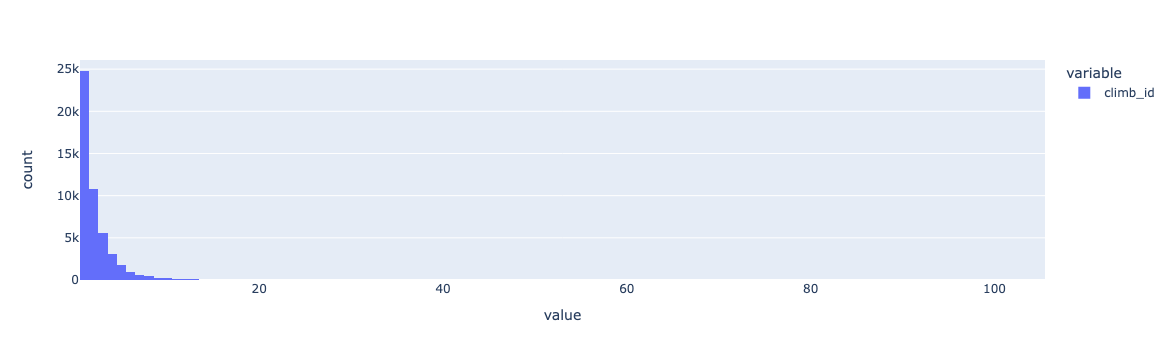

In [161]:
user_counts = climbers['# sends']
user_counts_by_day = ascents.groupby(['user', 'date'])['climb_id'].count().sort_values()
print(np.sum(user_counts==n_min), len(user_counts), np.sum(user_counts_by_day==1), np.sum(user_counts_by_day))
px.histogram(data_frame=user_counts_by_day)

In [176]:
dup_1st_ascent = ascents.loc[ascents['first-ascent'], 'climb_id'][ascents.loc[ascents['first-ascent'], 'climb_id'].duplicated()]

# Grade conversion

In [221]:
grades = pd.DataFrame( 
    #"boulder"        
    [{"id":"10","grade":"V0"},{"id":"14","grade":"V1"},{"id":"18","grade":"V2"},{"id":"22","grade":"V3"},
              {"id":"28","grade":"V4"},{"id":"34","grade":"V5"},{"id":"40","grade":"V6"},{"id":"44","grade":"V7"},
              {"id":"48","grade":"V8"},{"id":"54","grade":"V9"},{"id":"59","grade":"V10"},{"id":"64","grade":"V11"},
              {"id":"69","grade":"V12"},{"id":"74","grade":"V13"},{"id":"79","grade":"V14"},{"id":"84","grade":"V15"},
              {"id":"89","grade":"V16"},{"id":"94","grade":"V17"},
    #"sport"
     {"id":"1","grade":"5.1"},{"id":"2","grade":"5.2"},{"id":"3","grade":"5.3"},{"id":"4","grade":"5.4"},
            {"id":"5","grade":"5.5"},{"id":"6","grade":"5.6"},{"id":"7","grade":"5.7"},{"id":"12","grade":"5.8"},
            {"id":"22","grade":"5.9"},{"id":"27","grade":"5.10a"},{"id":"32","grade":"5.10b"},{"id":"37","grade":"5.10c"},
            {"id":"42","grade":"5.10d"},{"id":"47","grade":"5.11a"},{"id":"51","grade":"5.11b"},{"id":"53","grade":"5.11c"},
            {"id":"57","grade":"5.11d"},{"id":"62","grade":"5.12a"},{"id":"67","grade":"5.12b"},{"id":"72","grade":"5.12c"},
            {"id":"77","grade":"5.12d"},{"id":"82","grade":"5.13a"},{"id":"87","grade":"5.13b"},{"id":"92","grade":"5.13c"},
            {"id":"97","grade":"5.13d"},{"id":"102","grade":"5.14a"},{"id":"107","grade":"5.14b"},{"id":"112","grade":"5.14c"},
            {"id":"117","grade":"5.14d"},{"id":"122","grade":"5.15a"},{"id":"127","grade":"5.15b"},{"id":"132","grade":"5.15c"},
            {"id":"137","grade":"5.15d"},])
    # "french_boulder"
    #  {"id":"1","grade":"1"},{"id":"2","grade":"2"},{"id":"3","grade":"3A"},{"id":"4","grade":"3B"},
    #                  {"id":"5","grade":"3C"},{"id":"6","grade":"4A"},{"id":"7","grade":"4B"},{"id":"8","grade":"4C"},
    #                  {"id":"10","grade":"5A"},{"id":"14","grade":"5B"},{"id":"18","grade":"5C"},{"id":"22","grade":"6A"},
    #                  {"id":"25","grade":"6A+"},{"id":"28","grade":"6B"},{"id":"31","grade":"6B+"},{"id":"34","grade":"6C"},
    #                  {"id":"37","grade":"6C+"},{"id":"40","grade":"7A"},{"id":"44","grade":"7A+"},{"id":"48","grade":"7B"},
    #                  {"id":"51","grade":"7B+"},{"id":"54","grade":"7C"},{"id":"59","grade":"7C+"},{"id":"64","grade":"8A"},
    #                  {"id":"69","grade":"8A+"},{"id":"74","grade":"8B"},{"id":"79","grade":"8B+"},{"id":"84","grade":"8C"},
    #                  {"id":"89","grade":"8C+"},{"id":"94","grade":"9A"},
    # # "french_sport"
    #  {"id":"1","grade":"1"},{"id":"2","grade":"2"},{"id":"3","grade":"3a"},{"id":"4","grade":"3b"},
    #                {"id":"5","grade":"3c"},{"id":"6","grade":"4a"},{"id":"7","grade":"4b"},{"id":"9","grade":"4c"},
    #                {"id":"12","grade":"5a"},{"id":"17","grade":"5b"},{"id":"22","grade":"5c"},{"id":"27","grade":"6a"},
    #                {"id":"32","grade":"6a+"},{"id":"37","grade":"6b"},{"id":"42","grade":"6b+"},{"id":"47","grade":"6c"},
    #                {"id":"52","grade":"6c+"},{"id":"57","grade":"7a"},{"id":"62","grade":"7a+"},{"id":"67","grade":"7b"},
    #                {"id":"72","grade":"7b+"},{"id":"77","grade":"7c"},{"id":"82","grade":"7c+"},{"id":"87","grade":"8a"},
    #                {"id":"92","grade":"8a+"},{"id":"97","grade":"8b"},{"id":"102","grade":"8b+"},{"id":"107","grade":"8c"},
    #                {"id":"112","grade":"8c+"},{"id":"117","grade":"9a"},{"id":"122","grade":"9a+"},{"id":"127","grade":"9b"},
    #                {"id":"132","grade":"9b+"},{"id":"137","grade":"9c"}])

In [222]:
grades.loc[:17, 'type']='boulder'
grades.loc[18:50, 'type']='sport'
grades.loc[:50, 'a'] = np.concatenate([np.arange(18), np.arange(33)])
g_boulder = lambda a: a/17
g_inv_boulder = lambda g: 17*g
grades.loc[:17, 'g'] = g_boulder(grades.loc[:17, 'a'])
g_sport = lambda a: (np.exp(a/12)-1)/(np.exp(32/12)-1)
g_inv_sport = lambda g: 12*np.log((np.exp(32/12)-1)*g+1)
grades.loc[18:50, 'g'] = g_sport(grades.loc[18:50, 'a'])

g_transforms = {'bouder': g_boulder, 
                'sport': g_sport}
grades = grades.set_index(['type', 'grade'])
grades

id     a         g
type    grade                     
boulder V0      10   0.0  0.000000
        V1      14   1.0  0.058824
        V2      18   2.0  0.117647
        V3      22   3.0  0.176471
        V4      28   4.0  0.235294
        V5      34   5.0  0.294118
        V6      40   6.0  0.352941
        V7      44   7.0  0.411765
        V8      48   8.0  0.470588
        V9      54   9.0  0.529412
        V10     59  10.0  0.588235
        V11     64  11.0  0.647059
        V12     69  12.0  0.705882
        V13     74  13.0  0.764706
        V14     79  14.0  0.823529
        V15     84  15.0  0.882353
        V16     89  16.0  0.941176
        V17     94  17.0  1.000000
sport   5.1      1   0.0  0.000000
        5.2      2   1.0  0.006489
        5.3      3   2.0  0.013543
        5.4      4   3.0  0.021209
        5.5      5   4.0  0.029541
        5.6      6   5.0  0.038598
        5.7      7   6.0  0.048441
        5.8     12   7.0  0.059140
        5.9     22   8.0  0.070769
        5.10a   27   9.0  0.083409
        5.10b   32  10.0  0.097146
        5.10c   37  11.0  0.112078
        5.10d   42  12.0  0.128307
        5.11a   47  13.0  0.145947
        5.11b   51  14.0  0.165120
        5.11c   53  15.0  0.185959
        5.11d   57  16.0  0.208609
        5.12a   62  17.0  0.233227
        5.12b   67  18.0  0.259984
        5.12c   72  19.0  0.289067
        5.12d   77  20.0  0.320678
        5.13a   82  21.0  0.355035
        5.13b   87  22.0  0.392379
        5.13c   92  23.0  0.432967
        5.13d   97  24.0  0.477083
        5.14a  102  25.0  0.525033
        5.14b  107  26.0  0.577150
        5.14c  112  27.0  0.633795
        5.14d  117  28.0  0.695364
        5.15a  122  29.0  0.762283
        5.15b  127  30.0  0.835018
        5.15c  132  31.0  0.914074
        5.15d  137  32.0  1.000000

In [179]:
def grade_num(type_s, grade_str_s):
    neg = grade_str_s.str.contains('-')
    pos = grade_str_s.str.contains('\+')
    grade_str_s[neg|pos] = grade_str_s[neg|pos].str[:-1]
    
    bs = (type_s == 'boulder').values
    ss = np.isin(type_s, ['sport', 'trad'])
    g = np.zeros(len(grade_str_s))
    g[bs] = g_boulder(grades.loc['boulder'].loc[grade_str_s[bs], 'a'].values + 0.33*(pos[bs].astype(int) - neg[bs].astype(int)))
    g[ss] = g_sport(grades.loc['sport'].loc[grade_str_s[ss], 'a'].values + 0.33*(pos[ss].astype(int) - neg[ss].astype(int)))
    return g

In [180]:
ascents['type']=climbs_df.loc[ascents['climb_id'],'type'].values

In [181]:
climbs['g'] = grade_num(climbs['type'], climbs['grade'].copy())
ascents['g'] = grade_num(climbs_df.loc[ascents['climb_id'],'type'], ascents['grade'].copy())

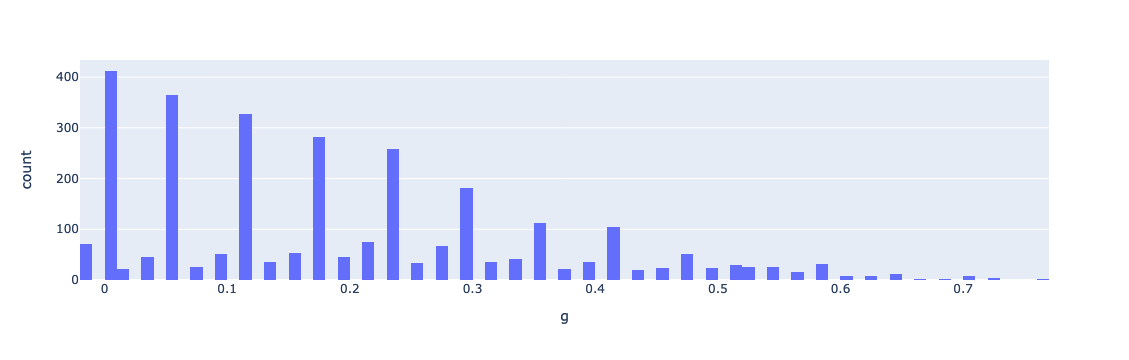

In [183]:
px.histogram(data_frame=climbs[climbs['type']=='boulder'], x='g', nbins=100)

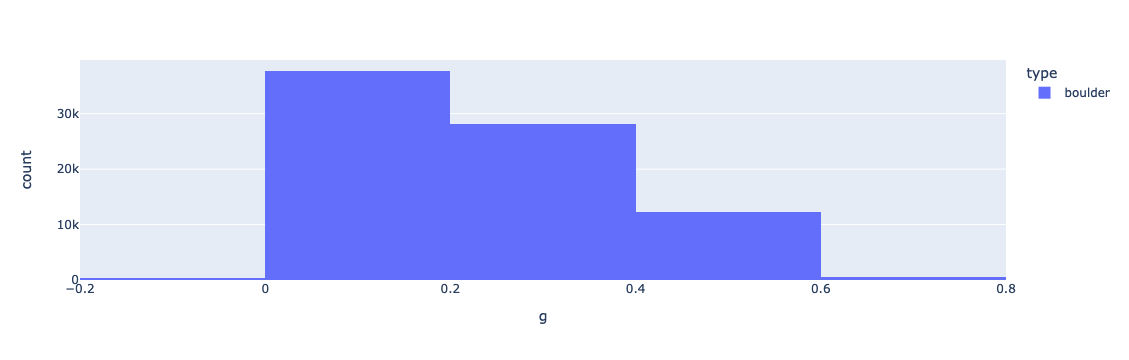

In [192]:
px.histogram(data_frame=ascents[ascents['type']=='boulder'], x='g', color='type', nbins=7)

In [231]:
climb_grades = ascents[['g', 'climb_id']].groupby('climb_id').mean()
climb_grades.loc[climb_id]

g    0.127807
Name: 92873, dtype: float64

In [232]:
climbs.loc[climb_grades.index, 'g_mean'] = climb_grades['g']

In [262]:
ascents

climb_id              user       date grade     style  first-ascent  \
0          36410        sawyer-mae 2022-11-20    V4  redpoint         False   
1          36410  calumtustinmayes 2022-11-13    V4  redpoint         False   
2          36410              mike 2022-11-10    V4  redpoint         False   
3          36410        christiane 2022-11-02    V4  redpoint         False   
4          36410     maude-johnson 2022-11-01    V4  redpoint         False   
...          ...               ...        ...   ...       ...           ...   
131472    136309        noahjarvis 2022-06-17    V2     flash         False   
131473    136309         calvintse 2022-06-14    V2  redpoint         False   
131474    136309       logan-swett 2022-06-14    V2  redpoint         False   
131475    136309             johnd 2022-06-11    V2     flash         False   
131476    136309   forrestbjornson 2022-05-07    V2     flash          True   

        stars                                           comments  \
0         4.0                                                      
1         4.0         Night send! Slopers feel great in the cold   
2         3.0                         Good condies at 0 degrees.   
3         5.0                                                      
4         5.0                                                      
...       ...                                                ...   
131472    2.0                                        Jump start!   
131473    NaN                                                      
131474    NaN                                                      
131475    3.0  Dries fast, solid holds, fun mantle, good land...   
131476    2.0                                         Why not...   

                                                     beta     type         g  \
0                                                    None  boulder  0.235294   
1                                                    None  boulder  0.235294   
2                                                    None  boulder  0.235294   
3                                                    None  boulder  0.235294   
4                                                    None  boulder  0.235294   
...                                                   ...      ...       ...   
131472                                               None  boulder  0.117647   
131473                                               None  boulder  0.117647   
131474                                               None  boulder  0.117647   
131475  Reach if you're &gt;6' tall; if shorter, stack...  boulder  0.117647   
131476                                               None  boulder  0.117647   

        grade_num  
0             4.0  
1             4.0  
2             4.0  
3             4.0  
4             4.0  
...           ...  
131472        2.0  
131473        2.0  
131474        2.0  
131475        2.0  
131476        2.0  

[130311 rows x 12 columns]

# Progressions

In [268]:
ascents['year'] = ascents['date'].dt.year 

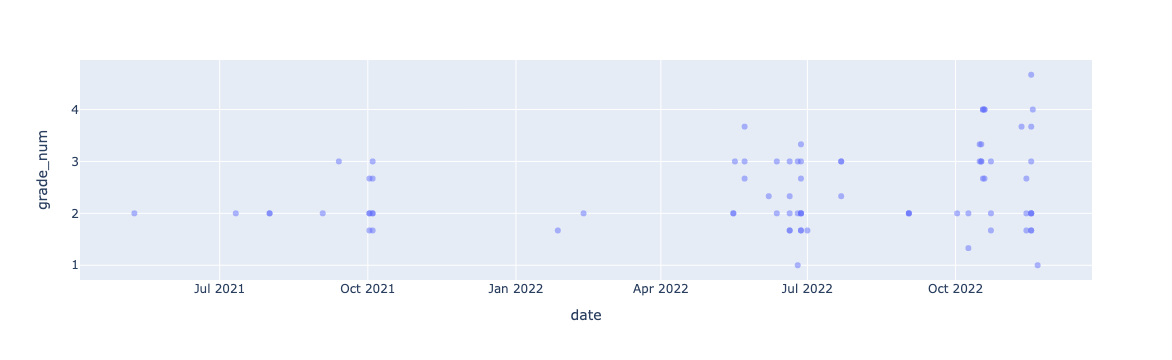

In [254]:
my_boulders = ascents.loc[(ascents['user']=='larathompson') &
                  (ascents['type']=='boulder')]#.sort_values('date')
px.scatter(data_frame=my_boulders,
           x='date', y='grade_num', opacity=0.5, hover_data=['climb_id', 'grade'])

In [316]:
boulders_by_date = ascents.loc[ascents['type']=='boulder'].groupby(['user', 'year'])['grade_num'].max().reset_index(level=1)

In [315]:
g, c = np.unique(boulders_by_date['grade_num'], return_counts=True)
g[np.argsort(c)], np.max(c)

(array([ 1.67,  1.33, 12.67, 11.33,  3.33, 12.33,  2.33,  8.33,  2.67,
         3.67, 11.67, 13.  , 10.67,  5.33,  4.33,  9.33,  6.33,  7.33,
        10.33,  0.  ,  4.67,  5.67,  1.  , 12.  ,  7.67,  9.67,  8.67,
         6.67,  2.  , 11.  ,  3.  ,  6.  , 10.  ,  9.  ,  8.  ,  4.  ,
         7.  ,  5.  ]),
 447)

In [314]:
c

array([ 30,  54,   2,   1,  94,   8,   9, 201,   6,  11, 359,  15,  41,
       447,  14,  42, 288,  18,  85, 421,  24,  68, 349,   9,  78, 309,
        16,  74, 301,  28,  13, 108,   6,  12,  62,   8,   5,  12])

In [319]:
boulders_by_date.loc[user_min_year.index, 'x'] = boulders_by_date.loc[user_min_year.index, 'year'] - user_min_year #+ user_min_grade.loc[user_min_year.index]

In [301]:
user_min_year = ascents.loc[ascents['type']=='boulder'].groupby(['user'])['year'].min().dropna()
user_min_grade = boulders_by_date.reset_index().groupby(['user'])['grade_num'].min()


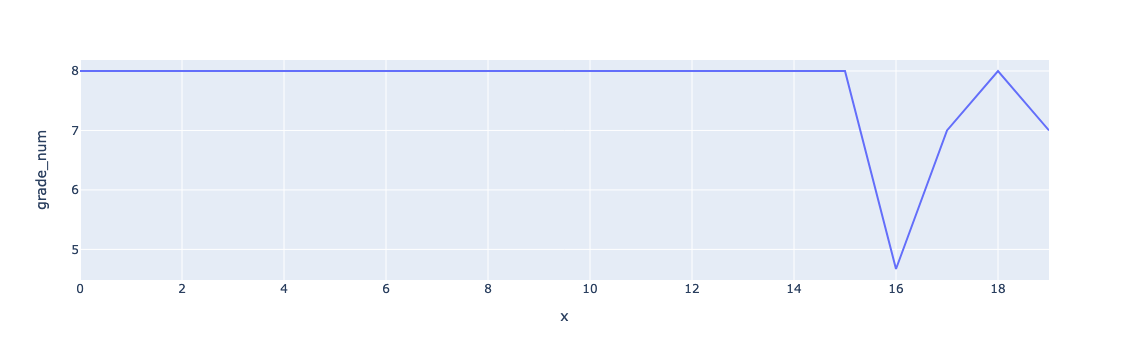

In [324]:
user='trent-hoover'
px.line(data_frame=boulders_by_date.loc[user], x='x', y='grade_num')#, opacity=0.2) #, color='user'

In [264]:
climb_id = 57757
climbs.loc[climb_id, 'slug'], g_inv_boulder(climbs.loc[climb_id, 'g_mean'])

('jenga-godman-creek-vancouver-bc-canada', 3.9594736842105265)

# Building the Graph

In [79]:
ascents.head()

climb_id              user       date grade     style  first-ascent  stars  \
0     36410        sawyer-mae 2022-11-20    V4  redpoint         False    4.0   
1     36410  calumtustinmayes 2022-11-13    V4  redpoint         False    4.0   
2     36410              mike 2022-11-10    V4  redpoint         False    3.0   
3     36410        christiane 2022-11-02    V4  redpoint         False    5.0   
4     36410     maude-johnson 2022-11-01    V4  redpoint         False    5.0   

                                     comments  beta  
0                                              None  
1  Night send! Slopers feel great in the cold  None  
2                  Good condies at 0 degrees.  None  
3                                              None  
4                                              None

In [80]:
climbs_df.head()

slug  \
36410  easy-in-easy-chair-easy-chair-grand-wall-bould...   
36512  superfly-superfly-grand-wall-boulders-squamish...   
36476  titanic-titanic-north-grand-wall-boulders-squa...   
35610  trad-killer-heartbreak-hotel-grand-wall-boulde...   
3049   timeless-titanic-south-grand-wall-boulders-squ...   

                        name  area_id     type  grade_id  bolts  length grade  \
36410  Easy In An Easy Chair     7521  boulder        29      0     NaN    V4   
36512               Superfly     8353  boulder        29      0     NaN    V4   
36476                Titanic     8360  boulder        24      0     NaN   V3+   
35610            Trad Killer     8351  boulder        28      0     NaN    V4   
3049                Timeless     8361  boulder        32      0     NaN   V5-   

                                             description  # onsights  \
36410  Traverse left to right on good slopers. A clas...          27   
36512  A Squamish all-time classic with physical move...          22   
36476  Start standing with opposing edges for your ha...          58   
35610                                               None          37   
3049   Start matched on the big shelf and climb up an...          22   

       # redpoint  # flashes  # sends areas_0_name         areas_1_name  \
36410         550         88      665     Squamish  Grand Wall Boulders   
36512         569         73      664     Squamish  Grand Wall Boulders   
36476         458        133      649     Squamish  Grand Wall Boulders   
35610         435         77      549     Squamish  Grand Wall Boulders   
3049          409         82      513     Squamish  Grand Wall Boulders   

           areas_2_name        areas_0_slug  \
36410        Easy Chair  squamish-bc-canada   
36512          Superfly  squamish-bc-canada   
36476     Titanic North  squamish-bc-canada   
35610  Heartbreak Hotel  squamish-bc-canada   
3049      Titanic South  squamish-bc-canada   

                                 areas_1_slug  \
36410  grand-wall-boulders-squamish-bc-canada   
36512  grand-wall-boulders-squamish-bc-canada   
36476  grand-wall-boulders-squamish-bc-canada   
35610  grand-wall-boulders-squamish-bc-canada   
3049   grand-wall-boulders-squamish-bc-canada   

                                            areas_2_slug areas_3_name  \
36410  easy-chair-grand-wall-boulders-squamish-bc-canada          NaN   
36512    superfly-grand-wall-boulders-squamish-bc-canada          NaN   
36476  titanic-north-grand-wall-boulders-squamish-bc-...          NaN   
35610  heartbreak-hotel-grand-wall-boulders-squamish-...          NaN   
3049   titanic-south-grand-wall-boulders-squamish-bc-...          NaN   

      areas_3_slug areas_4_name areas_4_slug areas_5_name areas_5_slug  \
36410          NaN          NaN          NaN          NaN          NaN   
36512          NaN          NaN          NaN          NaN          NaN   
36476          NaN          NaN          NaN          NaN          NaN   
35610          NaN          NaN          NaN          NaN          NaN   
3049           NaN          NaN          NaN          NaN          NaN   

      areas_6_name areas_6_slug areas_7_name areas_7_slug areas_8_name  \
36410          NaN          NaN          NaN          NaN          NaN   
36512          NaN          NaN          NaN          NaN          NaN   
36476          NaN          NaN          NaN          NaN          NaN   
35610          NaN          NaN          NaN          NaN          NaN   
3049           NaN          NaN          NaN          NaN          NaN   

      areas_8_slug areas_9_name areas_10_name areas_11_name areas_9_slug  \
36410          NaN          NaN           NaN           NaN          NaN   
36512          NaN          NaN           NaN           NaN          NaN   
36476          NaN          NaN           NaN           NaN          NaN   
35610          NaN          NaN           NaN           NaN          NaN   
3049           NaN          NaN  

In [81]:
climbers_df.head()

id  # sends  connected  b_connected
name                                             
aaron          0       24       True         True
aaron-eden     1        2       True         True
aaron-miller   2       38       True        False
aaron-pardy    3      532       True         True
aaron-stein    4        2       True        False

In [315]:
area_0 = climbs_df['areas_0_name'].values
cols = np.tile(area_0[:, np.newaxis], (1, len(area_0)))
rows = np.tile(area_0[np.newaxis, :], (len(area_0), 1))
coloc_0 = np.where(cols==rows)

In [316]:
area_1 = climbs_df['areas_1_name'].values
cols = np.tile(area_1[:, np.newaxis], (1, len(area_1)))
rows = np.tile(area_1[np.newaxis, :], (len(area_1), 1))
coloc_1 = np.where(cols==rows)

In [373]:
climbs_feats = pd.concat([
    pd.get_dummies(climbs_df['type']),
                climbs_df['description'].isnull(),
               climbs_df[['# sends', #'# onsights', '# redpoint', '# flashes',
                          # 'ratings_mean', 'rate_rated', #'ratings_worst', 'ratings_best' are buggy
                          # 'g'  # better kept in ascents since this is just a bad average
                         ]]
               ], axis=1)
# climbs_feats['g'] = 0
climbs_feats

boulder  sport  trad  description  # sends
id                                               
36512        1      0     0        False      657
36410        1      0     0        False      652
36476        1      0     0        False      639
35610        1      0     0         True      538
3049         1      0     0        False      501
...        ...    ...   ...          ...      ...
83071        1      0     0         True        1
83465        1      0     0         True        1
83528        1      0     0         True        1
85195        1      0     0         True        1
85380        1      0     0         True        1

[13868 rows x 5 columns]

In [386]:
ascent_feats = pd.concat([
    pd.get_dummies(ascents['style']), # could also each be a kind of edge if that scales better in modelling
    # ascents[['g']], # , 'stars' are buggy
    ascents['comments'].isnull(), ascents['beta'].isnull()
    ], axis=1)
ascent_feats

flash  onsight  redpoint  comments   beta
0           0        0         1     False   True
1           0        0         1     False   True
2           1        0         0     False   True
3           0        0         1     False  False
4           0        0         1     False   True
...       ...      ...       ...       ...    ...
144626      1        0         0     False   True
144627      1        0         0     False  False
144628      1        0         0     False  False
144629      1        0         0     False   True
144630      1        0         0     False  False

[143670 rows x 5 columns]

In [387]:
g = dgl.heterograph({('climber', 'climbed_by', 'climb'):
                     (climbers_df.loc[ascents['user']]['id'].values, climbs_df.loc[ascents['climb_id']]['id_'].values),
                    ('climb', 'climbed', 'climber'):
                     (climbs_df.loc[ascents['climb_id']]['id_'].values, climbers_df.loc[ascents['user']]['id'].values),
                     ('climb', 'coloc_0', 'climb'): coloc_0,
                     ('climb', 'coloc_1', 'climb'): coloc_1
                     })

In [380]:
g.nodes['climber'].data['hv'] = th.tensor(climbers_df.drop('id', axis=1).astype('float').values)
g.nodes['climb'].data['hv'] = th.tensor(climbs_feats.astype('float').values)

In [388]:
g.edges['climbed'].data['he'] = th.tensor(ascent_feats.astype('float').values)
g.edges['climbed'].data['target'] = th.tensor(ascents['g'].values)
g.edges['climbed_by'].data['he'] = th.tensor(ascent_feats.astype('float').values)

# Graph Properties

In [348]:
# eg. what is the average grade on the climbs, using message passing and aggregating

In [349]:
import dgl.function as fn

In [382]:
g.multi_update_all({'climbed_by': (fn.copy_e('he', 'm'), fn.mean('m', 'g'))}, 'mean')

In [383]:
g

Graph(num_nodes={'climb': 13868, 'climber': 1995},
      num_edges={('climb', 'climbed', 'climber'): 143670, ('climb', 'coloc_0', 'climb'): 52551494, ('climb', 'coloc_1', 'climb'): 21174109, ('climber', 'climbed_by', 'climb'): 143670},
      metagraph=[('climb', 'climber', 'climbed'), ('climb', 'climb', 'coloc_0'), ('climb', 'climb', 'coloc_1'), ('climber', 'climb', 'climbed_by')])

In [384]:
g.nodes['climb'].data['g']

tensor([[0.2359],
        [0.2360],
        [0.1772],
        ...,
        [0.1176],
        [0.1176],
        [0.1176]], dtype=torch.float64)

In [385]:
g.nodes['climb'].data['hv']

tensor([[  1.,   0.,   0.,   0., 657.],
        [  1.,   0.,   0.,   0., 652.],
        [  1.,   0.,   0.,   0., 639.],
        ...,
        [  1.,   0.,   0.,   1.,   1.],
        [  1.,   0.,   0.,   1.,   1.],
        [  1.,   0.,   0.,   1.,   1.]], dtype=torch.float64)